# Gradient Descent from scratch

Frequently when doing data science, we’ll be trying to the find the best model for a certain situation. And usually “best” will mean something like “minimizes the error of its predictions” or “maximizes the likelihood of the data.” In other words, it will represent the solution to some sort of optimization problem.

This means we’ll need to solve a number of optimization problems. And in particular, we’ll need to solve them from scratch. Our approach will be a technique called gradient descent, which lends itself pretty well to a from-scratch treatment.

## Linear Algebra

In [ ]:
from typing import List

Vector = List[float]

height_weight_age = [70,  # inches,
                     170, # pounds,
                     40 ] # years

grades = [95,   # exam1
          80,   # exam2
          75,   # exam3
          62 ]  # exam4

def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

assert dot([1, 2, 3], [4, 5, 6]) == 32  # 1 * 4 + 2 * 5 + 3 * 6

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14  # 1 * 1 + 2 * 2 + 3 * 3

import math

def magnitude(v: Vector) -> float:
    """Returns the magnitude (or length) of v"""
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

assert magnitude([3, 4]) == 5

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))


def distance(v: Vector, w: Vector) -> float:  # type: ignore
    return magnitude(subtract(v, w))

# Another type alias
Matrix = List[List[float]]

A = [[1, 2, 3],  # A has 2 rows and 3 columns
     [4, 5, 6]]

B = [[1, 2],     # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

from typing import Tuple

def shape(A: Matrix) -> Tuple[int, int]:
    """Returns (# of rows of A, # of columns of A)"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0   # number of elements in first row
    return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3)  # 2 rows, 3 columns

def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i]             # A[i] is already the ith row

def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j]          # jth element of row A_i
            for A_i in A]   # for each row A_i

from typing import Callable

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i

def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

data = [[70, 170, 40],
        [65, 120, 26],
        [77, 250, 19],
        # ....
       ]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

#            user 0  1  2  3  4  5  6  7  8  9
#
friend_matrix = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # user 0
                 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],  # user 1
                 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # user 2
                 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],  # user 3
                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],  # user 4
                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],  # user 5
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 6
                 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # user 7
                 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],  # user 8
                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]  # user 9

assert friend_matrix[0][2] == 1, "0 and 2 are friends"
assert friend_matrix[0][8] == 0, "0 and 8 are not friends"

# only need to look at one row
friends_of_five = [i
                   for i, is_friend in enumerate(friend_matrix[5])
                   if is_friend]

Suppose we have some function f that takes as input a vector of real numbers and outputs a single real number. One simple such function is:

In [ ]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

We’ll frequently need to maximize or minimize such functions. That is, we need to find the input v that produces the largest (or smallest) possible value.

For functions like ours, the gradient (if you remember your calculus, this is the vector of partial derivatives) gives the input direction in which the function most quickly increases.

Accordingly, one approach to maximizing a function is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient (i.e., the direction that causes the function to increase the most), and repeat with the new starting point. Similarly, you can try to minimize a function by taking small steps in the opposite direction, as shown below:

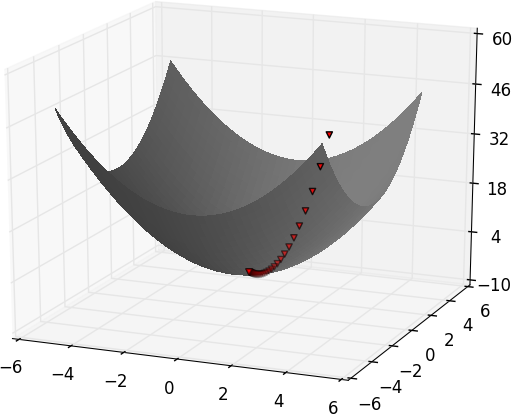

> Note: If a function has a unique global minimum, this procedure is likely to find it. If a function has multiple (local) minima, this procedure might “find” the wrong one of them, in which case you might rerun the procedure from different starting points. If a function has no minimum, then it’s possible the procedure might go on forever.

If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x. The derivative is defined as the limit of the difference quotients, as h approaches zero.

In [ ]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

The derivative is the slope of the tangent line at $(x, f(x))$, while the difference quotient is the slope of the not-quite-tangent line that runs through $(x+h, f(x+h))$. As h gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line:

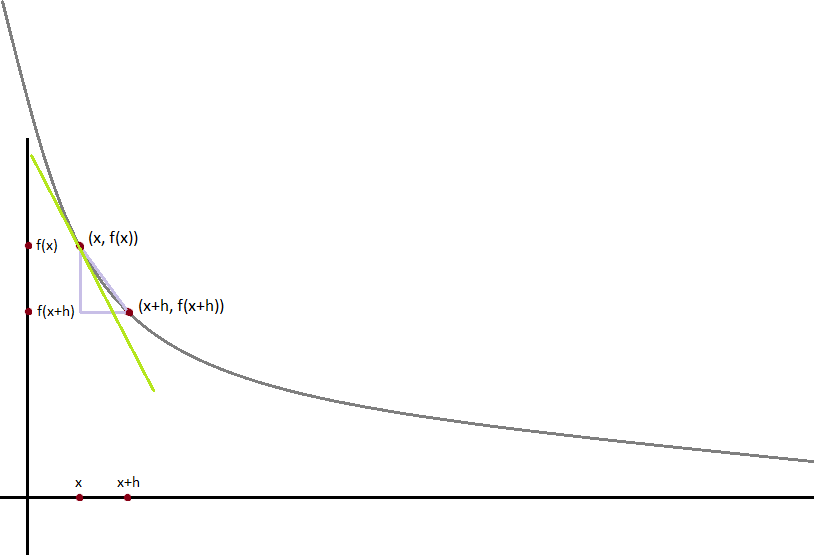

For many functions it’s easy to exactly calculate derivatives. For example, the square function:

In [ ]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

What if you couldn’t (or didn’t want to) find the gradient? Although we can’t take limits in Python, we can estimate derivatives by evaluating the difference quotient for a very small e. 

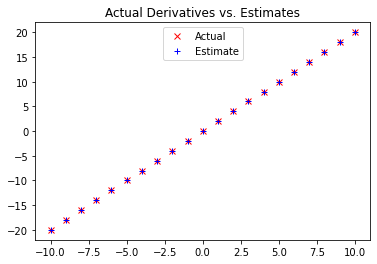

In [ ]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9)
plt.show()

When f is a function of many variables, it has multiple partial derivatives, each indicating how f changes when we make small changes in just one of the input variables.

We calculate its ith partial derivative by treating it as a function of just its ith variable, holding the other variables fixed:

In [ ]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

after which we can estimate the gradient the same way:

In [ ]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

It’s easy to see that the sum_of_squares function is smallest when its input v is a vector of zeros. But imagine we didn’t know that. Let’s use gradients to find the minimum among all three-dimensional vectors. We’ll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

In [ ]:
import random

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [ ]:
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

0 [-4.756800865430983, -9.32898415648543, -2.7256220350211895]
1 [-4.6616648481223635, -9.14240447335572, -2.671109594320766]
2 [-4.568431551159916, -8.959556383888605, -2.6176874024343504]
3 [-4.477062920136718, -8.780365256210834, -2.5653336543856633]
4 [-4.387521661733984, -8.604757951086617, -2.51402698129795]
5 [-4.299771228499304, -8.432662792064885, -2.463746441671991]
6 [-4.213775803929318, -8.264009536223588, -2.414471512838551]
7 [-4.129500287850732, -8.098729345499116, -2.36618208258178]
8 [-4.046910282093717, -7.936754758589133, -2.3188584409301445]
9 [-3.9659720764518425, -7.778019663417351, -2.2724812721115417]
10 [-3.8866526349228057, -7.622459270149004, -2.2270316466693107]
11 [-3.8089195822243496, -7.470010084746024, -2.1824910137359246]
12 [-3.7327411905798624, -7.3206098830511035, -2.138841193461206]
13 [-3.658086366768265, -7.174197685390081, -2.0960643695919816]
14 [-3.5849246394328995, -7.03071373168228, -2.054143082200142]
15 [-3.5132261466442416, -6.890099457048

## Choosing the Right Step Size


Although the rationale for moving against the gradient is clear, how far to move is not. Indeed, choosing the right step size is more of an art than a science. Popular options include:

- Using a fixed step size
- Gradually shrinking the step size over time
- At each step, choosing the step size that minimizes the value of the objective function

The last approach sounds great but is, in practice, a costly computation. To keep things simple, we’ll mostly just use a fixed step size. The step size that “works” depends on the problem—too small, and your gradient descent will take forever; too big, and you’ll take giant steps that might make the function you care about get larger or even be undefined. So we’ll need to experiment.

## Using Gradient Descent to Fit Models

If we think of our data as being fixed, then our loss function tells us how good or bad any particular model parameters are. This means we can use gradient descent to find the model parameters that make the loss as small as possible. Let’s look at a simple example:

In [ ]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In this case we know the parameters of the linear relationship between x and y, but imagine we’d like to learn them from the data. We’ll use gradient descent to find the slope and intercept that minimize the average squared error.

We’ll start off with a function that determines the gradient based on the error from a single data point:

In [ ]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual).
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

Now, that computation was for a single data point. For the whole dataset we’ll look at the mean squared error. And the gradient of the mean squared error is just the mean of the individual gradients.

So, here’s what we’re going to do:

1. Start with a random value for theta.
2. Compute the mean of the gradients.
3. Adjust theta in that direction.
4. Repeat.

After a lot of epochs (what we call each pass through the dataset), we should learn something like the correct parameters:

In [ ]:
# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001
n_epochs = 5000

for epoch in range(n_epochs):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    if epoch%(n_epochs//10)==0:
        print('@ epoch {}, slope={:.2f} and intercept={:.2f}'.format(epoch, theta[0], theta[1]))

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

@ epoch 0, slope=32.88 and intercept=-0.71
@ epoch 500, slope=20.00 and intercept=2.91
@ epoch 1000, slope=20.00 and intercept=4.23
@ epoch 1500, slope=20.00 and intercept=4.72
@ epoch 2000, slope=20.00 and intercept=4.90
@ epoch 2500, slope=20.00 and intercept=4.96
@ epoch 3000, slope=20.00 and intercept=4.99
@ epoch 3500, slope=20.00 and intercept=4.99
@ epoch 4000, slope=20.00 and intercept=5.00
@ epoch 4500, slope=20.00 and intercept=5.00


## Minibatch and Stochastic Gradient Descent

One drawback of the preceding approach is that we had to evaluate the gradients on the entire dataset before we could take a gradient step and update our parameters. In this case it was fine, because our dataset was only 100 pairs and the gradient computation was cheap.

Your models, however, will frequently have large datasets and expensive gradient computations. In that case you’ll want to take gradient steps more often.

We can do this using a technique called minibatch gradient descent, in which we compute the gradient (and take a gradient step) based on a “minibatch” sampled from the larger dataset:

In [ ]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

> Note: The TypeVar(T) allows us to create a “generic” function. It says that our dataset can be a list of any single type—strs, ints, lists, whatever—but whatever that type is, the outputs will be batches of it.

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

n_epochs = 1000

for epoch in range(n_epochs):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    if epoch%(n_epochs//10)==0:
        print('@ epoch {}, slope={:.2f} and intercept={:.2f}'.format(epoch, theta[0], theta[1]))

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

@ epoch 0, slope=16.63 and intercept=0.71
@ epoch 100, slope=20.02 and intercept=4.51
@ epoch 200, slope=19.96 and intercept=4.90
@ epoch 300, slope=20.00 and intercept=4.98
@ epoch 400, slope=20.00 and intercept=5.00
@ epoch 500, slope=20.00 and intercept=5.00
@ epoch 600, slope=20.00 and intercept=5.00
@ epoch 700, slope=20.00 and intercept=5.00
@ epoch 800, slope=20.00 and intercept=5.00
@ epoch 900, slope=20.00 and intercept=5.00


Another variation is stochastic gradient descent, in which you take gradient steps based on one training example at a time:

In [ ]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

n_epochs = 100

for epoch in range(n_epochs):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    if epoch%(n_epochs//10)==0:
        print('@ epoch {}, slope={:.2f} and intercept={:.2f}'.format(epoch, theta[0], theta[1]))
        
slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

@ epoch 0, slope=20.10 and intercept=0.26
@ epoch 10, slope=20.06 and intercept=1.95
@ epoch 20, slope=20.04 and intercept=3.03
@ epoch 30, slope=20.03 and intercept=3.73
@ epoch 40, slope=20.02 and intercept=4.18
@ epoch 50, slope=20.01 and intercept=4.47
@ epoch 60, slope=20.01 and intercept=4.66
@ epoch 70, slope=20.00 and intercept=4.78
@ epoch 80, slope=20.00 and intercept=4.86
@ epoch 90, slope=20.00 and intercept=4.91


On this problem, stochastic gradient descent finds the optimal parameters in a much smaller number of epochs. But there are always tradeoffs. Basing gradient steps on small minibatches (or on single data points) allows you to take more of them, but the gradient for a single point might lie in a very different direction from the gradient for the dataset as a whole.

In addition, if we weren’t doing our linear algebra from scratch, there would be performance gains from “vectorizing” our computations across batches rather than computing the gradient one point at a time.